# Exercise 3: Visualizing Training Data

You'll need to run the Unpack.ipynb notebook before this one!

## Setup

In [1]:
from pyiron import Project
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

/srv/conda/envs/notebook/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: NOT-A-GIT-REPOSITORY is an invalid version and will not be supported in a future release
  warnings.warn(


In [2]:
plt.rc('figure', figsize=(16,8))
plt.rc('font', size=18)

In [3]:
pr = Project('.')
if len(pr.create_group('training').list_nodes()) == 0:
    pr.unpack('training_export')
pr = Project('training')

## Loading Container

In [16]:
container = pr.load('basic')

## Some Predefined Plots

### Cell Information

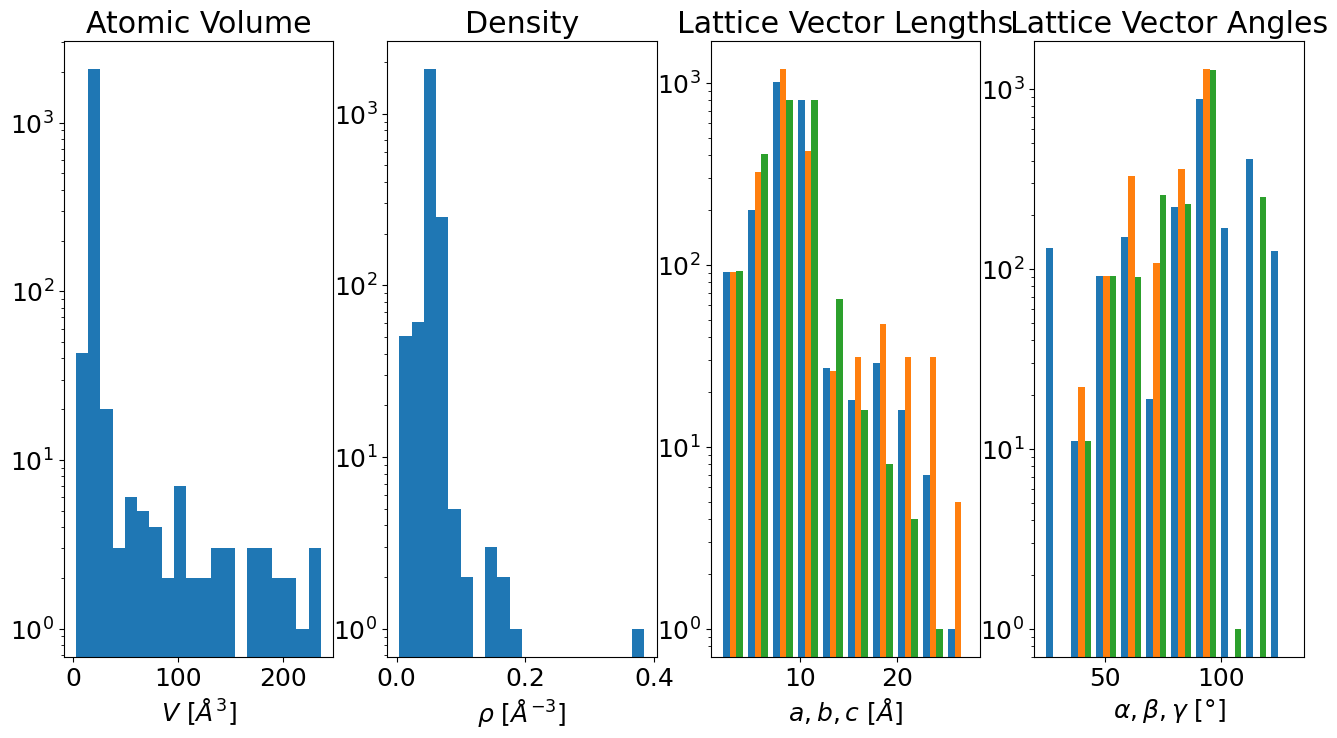

In [17]:
container.plot.cell();

### E-V Curves

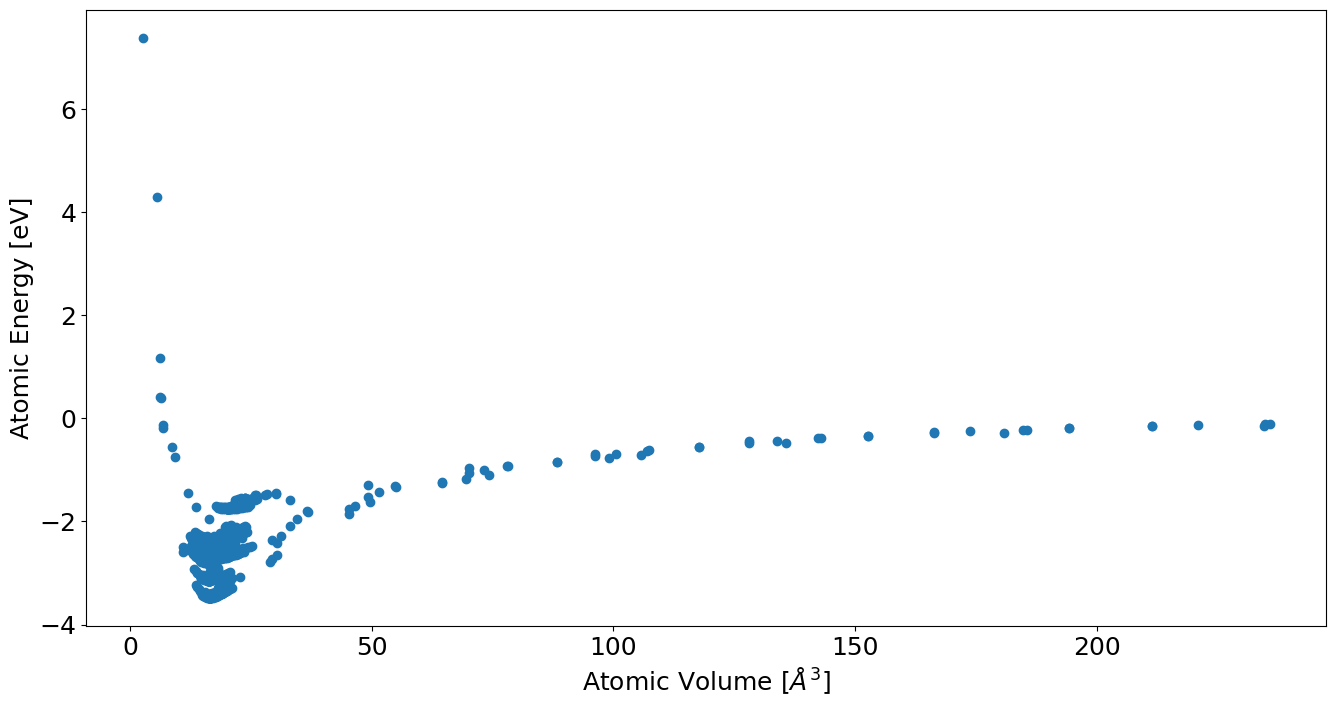

In [18]:
container.plot.energy_volume();

### Cell Symmetries

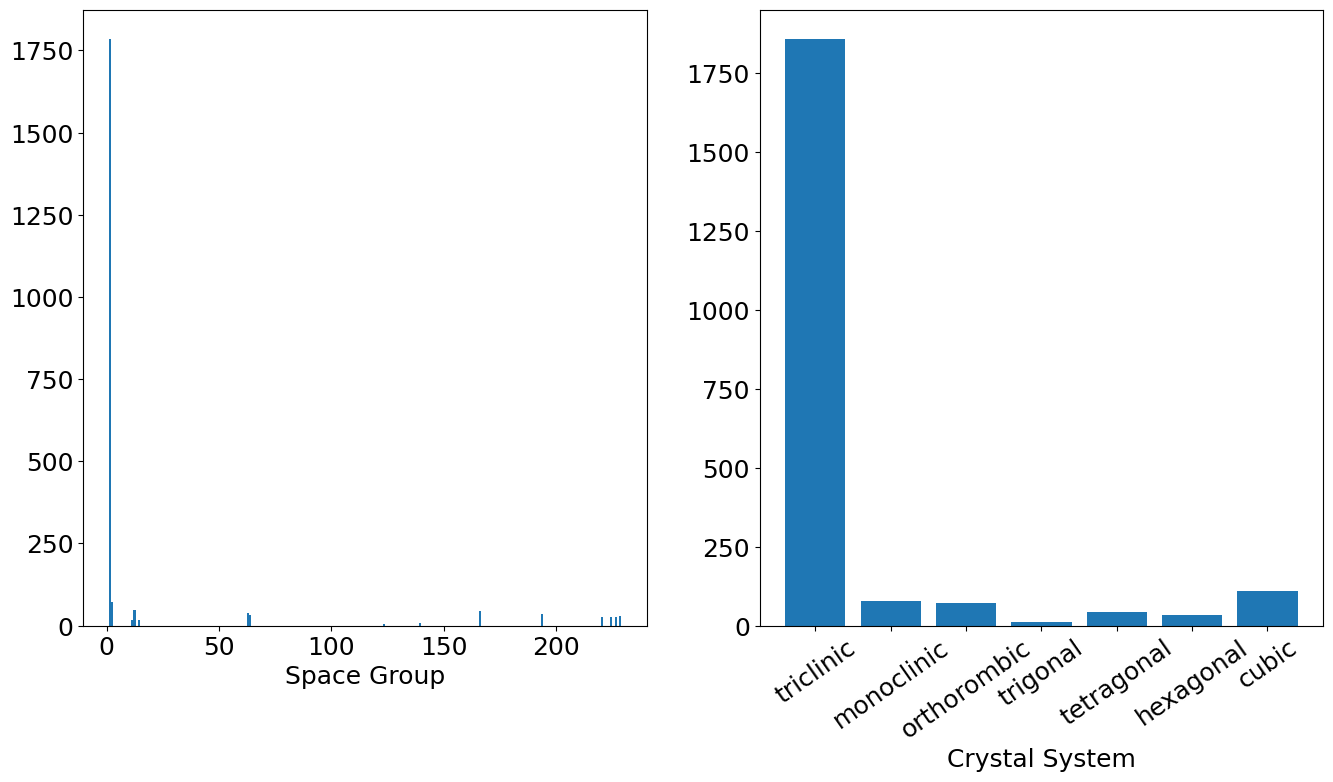

In [19]:
container.plot.spacegroups();

### Custom Plots from Data

In [20]:
df = container.to_pandas()

### E-V by Concentration

In [21]:
df['concentration'] = df.atoms.map(lambda s: (s.get_chemical_symbols()=='Li').mean())

In [22]:
df['energy_atom'] = (df.energy / df.number_of_atoms)

In [23]:
df['volume_atom'] = df.atoms.map(lambda s: s.get_volume(per_atom=True))

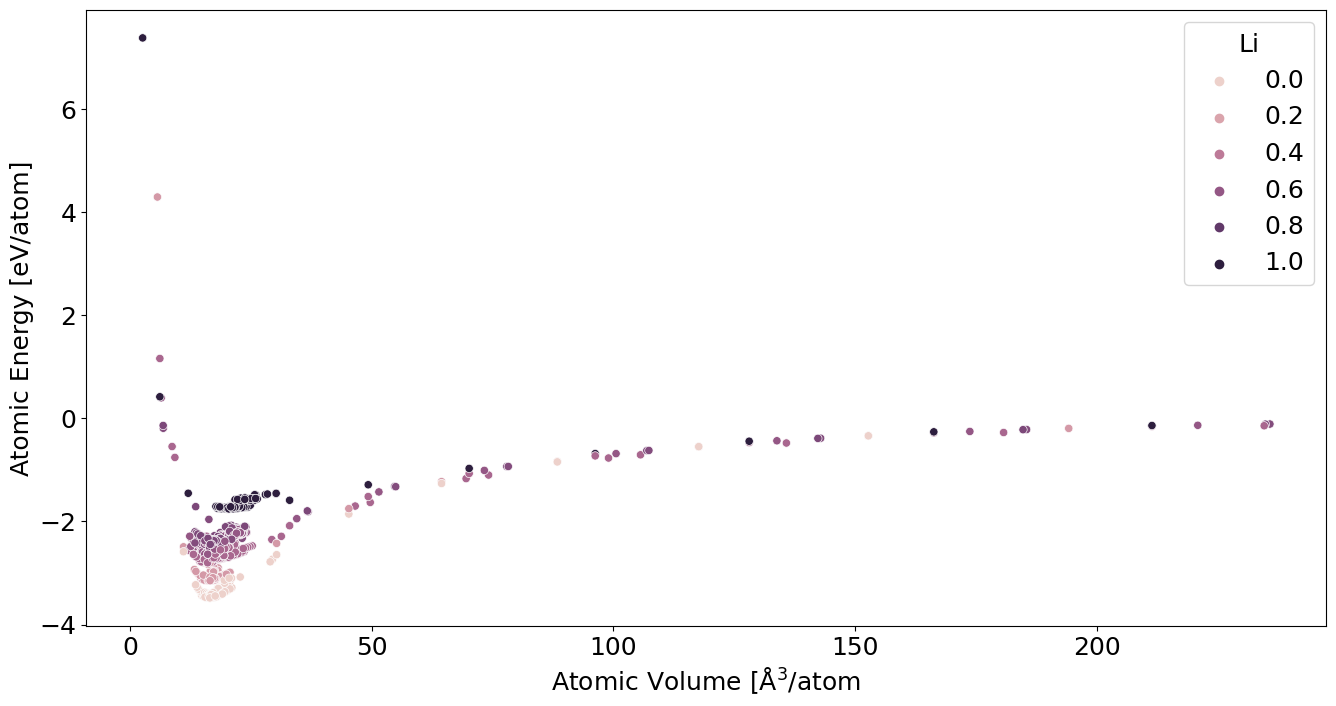

In [24]:
sns.scatterplot(
    data=df,
    x='volume_atom',
    y='energy_atom',
    hue='concentration'
)
plt.xlabel(r'Atomic Volume [$\mathrm{\AA}^3$/atom')
plt.ylabel(r'Atomic Energy [eV/atom]')
plt.legend(title='Li')

### Convex Hull

First find the equilibrium energy at the terminal concentrations.

In [25]:
e_min_al = df.query('concentration == 0').energy_atom.min()
e_min_li = df.query('concentration == 1').energy_atom.min()
print(e_min_al, e_min_li)

-3.4827513025 -1.757035875


Next calculate the deviation to the "ideal" mixing enthalpy

$$
e(c_\mathrm{Li}) = e_\mathrm{Al} + c_\mathrm{Li} (e_\mathrm{Li} - e_\mathrm{Al})
$$

and call that the energy excess, where $e$ are the per atom equilibrium energies of the pure phases.

In [26]:
df['energy_atom_excess'] = df.energy_atom - df.concentration * (e_min_li - e_min_al) - e_min_al

Text(0, 0.5, 'Excess Energy [eV/atom]')

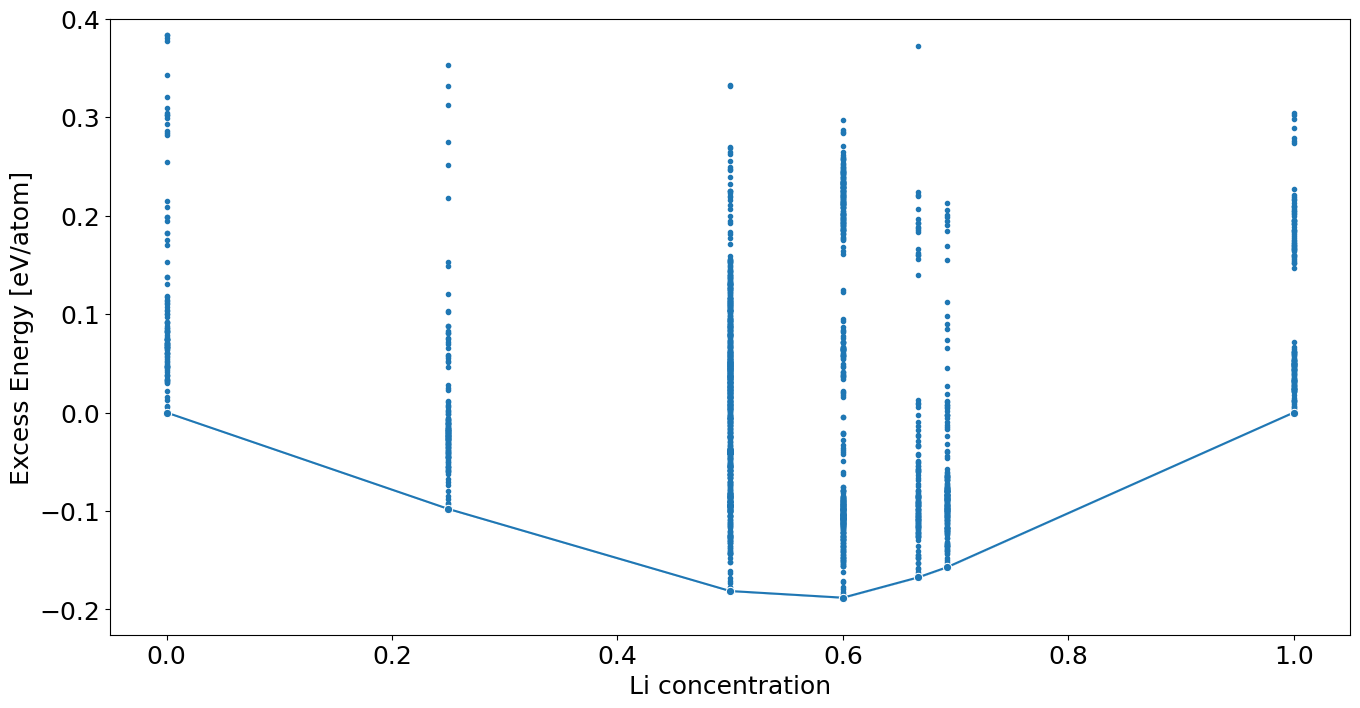

In [27]:
sns.lineplot(data=df,
             marker='o',
             x='concentration', y='energy_atom_excess',
             estimator=np.min)
plt.scatter(df.concentration, df.energy_atom_excess, marker='.')
plt.ylim(df.energy_atom_excess.min() * 1.2, .4)
plt.xlabel('Li concentration')
plt.ylabel('Excess Energy [eV/atom]')

## Extra Credit

1. Plot the energy against smallest nearest neighbor distance in a structure.  You can get the neighbor information with the [get_neighbor method](https://pyiron-atomistics.readthedocs.io/en/latest/apidoc/pyiron_atomistics.atomistics.structure.atoms.html?highlight=Atoms.get_neighbors#pyiron_atomistics.atomistics.structure.atoms.Atoms.get_neighbors) on a structure.